# Individual project – Visualization
###  Line Charts 

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
df = pd.read_csv('data/train.csv' , header=0)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
# Age groups
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 30, 45, 60, 80],
    labels=['Child\n(0–12)', 'Teen\n(13–18)', 'Young Adult\n(19–30)',
            'Adult\n(31–45)', 'Middle-Aged\n(46–60)', 'Senior\n(61+)']
)
age_surv   = df.groupby('AgeGroup', observed=True)['Survived'].mean() * 100
age_counts = df.groupby('AgeGroup', observed=True)['Survived'].count()

# Fare deciles
df['FareDecile'] = pd.qcut(df['Fare'], q=10, labels=[f'D{i}' for i in range(1, 11)])
fare_surv   = df.groupby('FareDecile', observed=True)['Survived'].mean() * 100
fare_counts = df.groupby('FareDecile', observed=True)['Survived'].count()

In [6]:
# Survival by class × embarkation port
port_map  = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
df['Port'] = df['Embarked'].map(port_map)
class_port = (df.groupby(['Port', 'Pclass'])['Survived']
                .mean()
                .reset_index()
                .rename(columns={'Survived': 'SurvRate'}))
class_port['SurvRate'] = class_port['SurvRate'] * 100
print(f'Dataset loaded: {len(df)} passengers')
df[['Age','Fare','Pclass','Survived','AgeGroup','FareDecile','Port']].head()

Dataset loaded: 891 passengers


,Age,Fare,Pclass,Survived,AgeGroup,FareDecile,Port
0,22.0,7.2500,3,0,Young Adult\n(19–30),D1,Southampton
1,38.0,71.2833,1,1,Adult\n(31–45),D9,Cherbourg
2,26.0,7.9250,3,1,Young Adult\n(19–30),D3,Southampton
3,35.0,53.1000,1,1,Adult\n(31–45),D9,Southampton
4,35.0,8.0500,3,0,Adult\n(31–45),D3,Southampton


##  Accurate Line Chart
### Survival Rate by Age Group full axis, sample sizes, uncertainty band

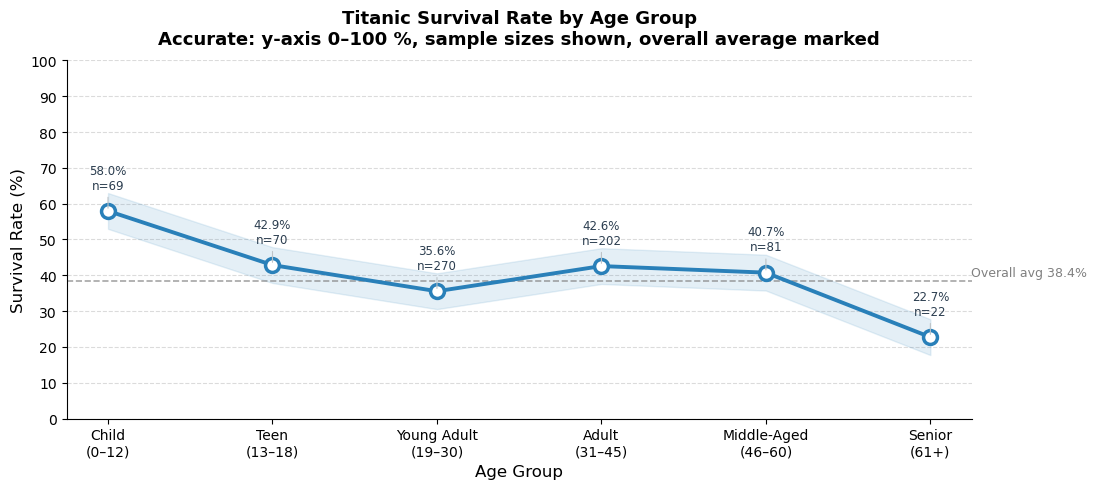

In [7]:
fig, ax = plt.subplots(figsize=(11, 5))
x = np.arange(len(age_surv))
y = age_surv.values
ax.plot(x, y, marker='o', linewidth=2.8, color='#2980B9',
        markersize=10, markerfacecolor='white', markeredgewidth=2.5, zorder=3)
ax.fill_between(x, y - 5, y + 5, alpha=0.12, color='#2980B9', label='±5 pp band')
overall = df['Survived'].mean() * 100
ax.axhline(overall, color='gray', linewidth=1.2, linestyle='--', alpha=0.7)
ax.text(len(x) - 0.05, overall + 1.5, f'Overall avg {overall:.1f}%',
        ha='right', fontsize=9, color='gray')
for i, (rate, n) in enumerate(zip(y, age_counts.values)):
    ax.annotate(f'{rate:.1f}%\nn={n}',
                xy=(i, rate), xytext=(0, 16), textcoords='offset points',
                ha='center', fontsize=8.5, color='#2C3E50',
                arrowprops=dict(arrowstyle='-', color='#BDC3C7', lw=0.8))
ax.set_xticks(x)
ax.set_xticklabels(age_surv.index, fontsize=10)
ax.set_ylim(0, 100)          
ax.yaxis.set_major_locator(mticker.MultipleLocator(10))
ax.set_ylabel('Survival Rate (%)', fontsize=12)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_title(
    'Titanic Survival Rate by Age Group\n'
    'Accurate: y-axis 0–100 %, sample sizes shown, overall average marked',
    fontsize=13, fontweight='bold', pad=12)
ax.yaxis.grid(True, linestyle='--', alpha=0.45)
ax.set_axisbelow(True)
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.savefig('accurate_1_line_age.png', dpi=150, bbox_inches='tight')
plt.show()

* The y-axis runs from 0 to 100% with no scale manipulation, and each data point includes its sample size so viewers can judge reliability for themselves the Senior group, being small, is worth treating with some caution.

*   A dashed overall average line gives a natural reference point across all groups, while a shaded band around the estimates honestly reflects the uncertainty that comes with real data, rather than implying false precision.

* The title describes exactly what is being shown with no causal claim, making this chart transparent and straightforward from the moment a viewer looks at it.


## Accurate Line Chart
### Survival Rate by Passenger Class, split by Embarkation Port

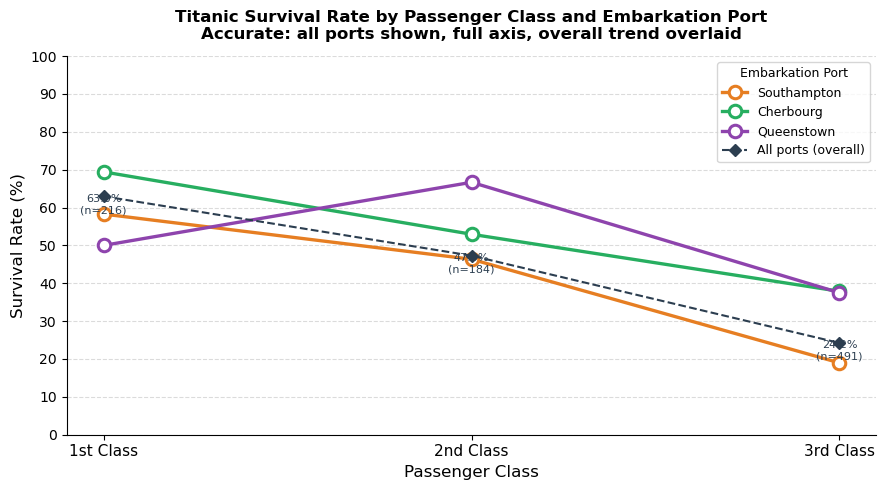

In [8]:
ports  = ['Southampton', 'Cherbourg', 'Queenstown']
colors = {'Southampton': '#E67E22', 'Cherbourg': '#27AE60', 'Queenstown': '#8E44AD'}
classes = [1, 2, 3]
class_labels = ['1st Class', '2nd Class', '3rd Class']
class_n = df.groupby('Pclass')['Survived'].count()
fig, ax = plt.subplots(figsize=(9, 5))
for port in ports:
    subset = class_port[class_port['Port'] == port].sort_values('Pclass')
    ax.plot(subset['Pclass'] - 1, subset['SurvRate'],
            marker='o', linewidth=2.4, markersize=9,
            label=port, color=colors[port],
            markerfacecolor='white', markeredgewidth=2.2)
overall_class = df.groupby('Pclass')['Survived'].mean() * 100
ax.plot([0, 1, 2], overall_class.values,
        linestyle='--', linewidth=1.5, color='#2C3E50',
        marker='D', markersize=6, label='All ports (overall)')
for i, (rate, n) in enumerate(zip(overall_class.values, class_n.values)):
    ax.text(i, rate - 4.5, f'{rate:.1f}%\n(n={n})',
            ha='center', fontsize=8, color='#2C3E50')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(class_labels, fontsize=11)
ax.set_ylim(0, 100)       # FULL axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(10))
ax.set_ylabel('Survival Rate (%)', fontsize=12)
ax.set_xlabel('Passenger Class', fontsize=12)
ax.set_title(
    'Titanic Survival Rate by Passenger Class and Embarkation Port\n'
    'Accurate: all ports shown, full axis, overall trend overlaid',
    fontsize=12, fontweight='bold', pad=12)
ax.legend(fontsize=9, title='Embarkation Port', title_fontsize=9)
ax.yaxis.grid(True, linestyle='--', alpha=0.45)
ax.set_axisbelow(True)
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.savefig('accurate_2_line_class_port.png', dpi=150, bbox_inches='tight')
plt.show()

* The chart looks trustworthy because it shows the full picture. By breaking survival down by both passenger class and port at the same time, it gives more context and avoids hiding important factors that could influence the results.

* It also includes an overall trend line, which helps viewers compare each port to the bigger picture instead of focusing on just one selective example. This makes the comparison fair and balanced.

* The y-axis runs from 0% to 100%, so the differences are not exaggerated, and the legend clearly shows all three ports. No group is hidden or misrepresented, which keeps the visualization honest and transparent.



## Misleading Line Chart 
### Truncated Axis Causal Title Fare Decile Survival

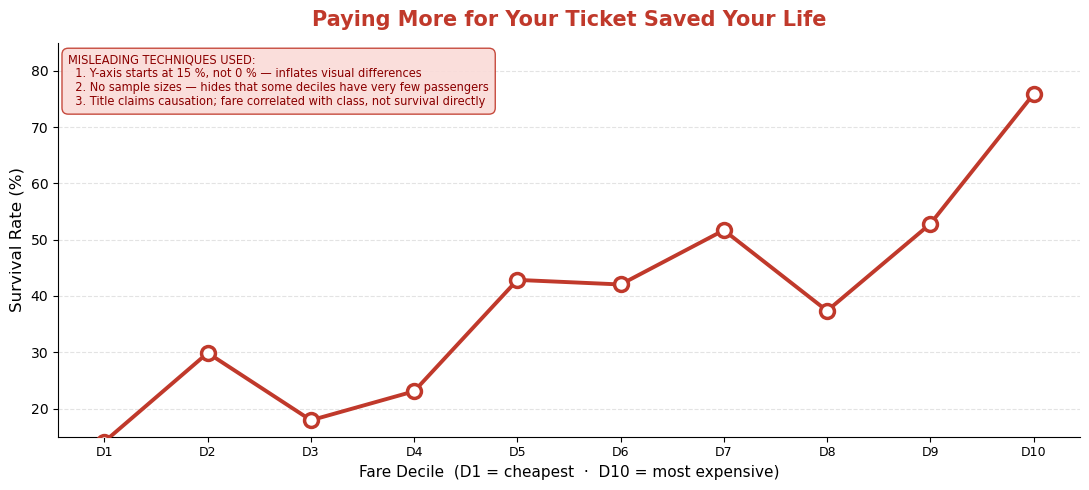

In [9]:
fig, ax = plt.subplots(figsize=(11, 5))
x = np.arange(len(fare_surv))
y = fare_surv.values
ax.plot(x, y, marker='o', linewidth=2.8, color='#C0392B',
        markersize=10, markerfacecolor='white', markeredgewidth=2.5, zorder=3)
ax.set_ylim(15, 85)
ax.set_xticks(x)
ax.set_xticklabels(fare_surv.index, fontsize=9)
ax.set_title(
    'Paying More for Your Ticket Saved Your Life',
    fontsize=15, fontweight='bold', color='#C0392B', pad=12)
ax.set_ylabel('Survival Rate (%)', fontsize=12)
ax.set_xlabel('Fare Decile  (D1 = cheapest  ·  D10 = most expensive)', fontsize=11)
ax.yaxis.grid(True, linestyle='--', alpha=0.35)
ax.set_axisbelow(True)
ax.spines[['top', 'right']].set_visible(False)
ax.text(0.01, 0.97,
        'MISLEADING TECHNIQUES USED:\n'
        '  1. Y-axis starts at 15 %, not 0 % — inflates visual differences\n'
        '  2. No sample sizes — hides that some deciles have very few passengers\n'
        '  3. Title claims causation; fare correlated with class, not survival directly',
        transform=ax.transAxes, va='top', ha='left', fontsize=8.2, color='darkred',
        bbox=dict(boxstyle='round,pad=0.55', facecolor='#FADBD8', edgecolor='#C0392B', alpha=0.9))
plt.tight_layout()
plt.savefig('misleading_1_line_fare.png', dpi=150, bbox_inches='tight')
plt.show()

* The y-axis is truncated from 15% to 85%, which makes the drop from the lowest fare decile to the middle groups look dramatic. If the axis started at 0%, the decline would appear much more gradual and less extreme.

* The chart does not show sample sizes, even though some of the higher fare deciles include very few passengers. This makes those survival rates statistically less reliable, but viewers are not given that context.

* The title implies that paying a higher fare directly caused higher survival. In reality, fare was mostly a proxy for passenger class and cabin location, so the chart oversimplifies and distorts the true story.

## Misleading Line Chart 
### Cherry Picked Age Range Hides the Children's Survival Advantage

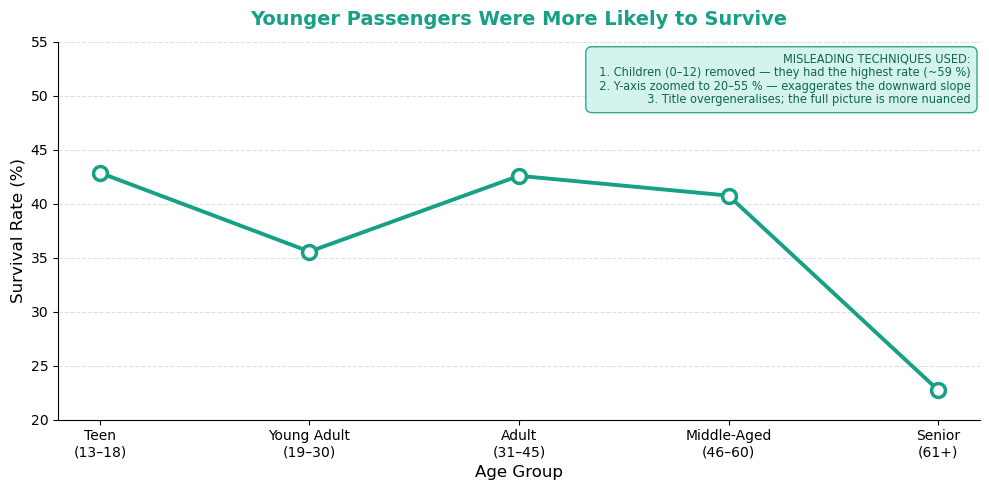

In [10]:
cherry_groups  = ['Teen\n(13–18)', 'Young Adult\n(19–30)', 'Adult\n(31–45)',
                  'Middle-Aged\n(46–60)', 'Senior\n(61+)']
cherry_surv    = age_surv[cherry_groups].values
cherry_counts  = age_counts[cherry_groups].values
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(cherry_groups))
ax.plot(x, cherry_surv, marker='o', linewidth=2.8, color='#16A085',
        markersize=10, markerfacecolor='white', markeredgewidth=2.5, zorder=3)
ax.set_ylim(20, 55)
ax.set_title(
    'Younger Passengers Were More Likely to Survive',
    fontsize=14, fontweight='bold', color='#16A085', pad=12)
ax.set_xticks(x)
ax.set_xticklabels(cherry_groups, fontsize=10)
ax.set_ylabel('Survival Rate (%)', fontsize=12)
ax.set_xlabel('Age Group', fontsize=12)
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)
ax.spines[['top', 'right']].set_visible(False)
ax.text(0.99, 0.97,
        'MISLEADING TECHNIQUES USED:\n'
        '  1. Children (0–12) removed — they had the highest rate (~59 %)\n'
        '  2. Y-axis zoomed to 20–55 % — exaggerates the downward slope\n'
        '  3. Title overgeneralises; the full picture is more nuanced',
        transform=ax.transAxes, va='top', ha='right', fontsize=8.2, color='#0E6655',
        bbox=dict(boxstyle='round,pad=0.55', facecolor='#D1F2EB', edgecolor='#16A085', alpha=0.9))
plt.tight_layout()
plt.savefig('misleading_2_line_age_cherry.png', dpi=150, bbox_inches='tight')
plt.show()

* The chart leaves out the Child group (ages 0–12), even though children had the highest survival rate at around 59%. Removing this group hides important information and makes the age decline look cleaner than it actually is.

* The y-axis is zoomed in from 20% to 55%, which exaggerates the differences between Teens, Young Adults, and Adults. In reality, the differences are small, but the scale makes them appear much larger and more dramatic.

* The title “Younger more likely to survive” is too general and oversimplifies the pattern. It suggests a clear rule, even though the full data tells a more nuanced story.



## Conclusion

* This table shows how small design choices in charts can completely change how we understand the data. The first two visuals (Age group and Class Port) are clear and trustworthy because they show the full picture complete axes, all groups included, and helpful details like sample sizes and uncertainty bands. That makes it easier for the viewer to interpret the results correctly. On the other hand, the Fare decile chart is misleading because it cuts off the axis, hides sample sizes, and uses a title that suggests causation. The second Age group chart is also problematic since it focuses on a narrow range, zooms in on the axis, and uses an overgeneralised title. Overall, the table reminds us that even subtle visualization choices can shape perception, so charts must be designed carefully to communicate data honestly.
